<a href="https://colab.research.google.com/github/jamesmattluyon/CPE-AIDL/blob/main/58026_PrExam_BrenanAndFriends/58026_PrExam_BrenanAndFriends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DL Problem Set Computational Programming Proof

###Perceptron Algorithm Script

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

>In preparation for perceptron algorithm, the least square method will be used


In [ ]:
def activation_function(y):
    if y > 0:
        y = 1
    elif y <= 0:
        y = 0
    return y

W = np.array([-1, -1])
b = 1


def perceptron_algorithm(x):
    y = np.dot(W, x) + b
    y = activation_function(y)
    return y

# Input values to verify the NOR logic 
input1 = np.array([0, 0])
input2 = np.array([0, 1])
input3 = np.array([1, 0])
input4 = np.array([1, 1])

# Printing the results
print('NOR Logic: \n')
print(f'x1 = 0 and x2 = 0 => y = {perceptron_algorithm(input1)}')
print(f'x1 = 0 and x2 = 1 => y = {perceptron_algorithm(input2)}')
print(f'x1 = 1 and x2 = 0 => y = {perceptron_algorithm(input3)}')
print(f'x1 = 1 and x2 = 1 => y = {perceptron_algorithm(input4)}')

NOR Logic: 

x1 = 0 and x2 = 0 => y = 1
x1 = 0 and x2 = 1 => y = 0
x1 = 1 and x2 = 0 => y = 0
x1 = 1 and x2 = 1 => y = 0


In [ ]:
X = np.array([[1,0,0],
 [1,0,1],
 [1,1,0 ],
 [1,1,1]])

y=np.array([[0],
 [0],
 [0],
 [1]])

In [ ]:
def sigmoid_func(x):
 y=1+np.exp(-x)
 y=1/y
 return y

def fwd_pass(X_training, wt1, wt2):
  a1=np.matmul(X_training,wt1)
  z1=sigmoid_func(a1)
  len_z1=len(z1)
  b=np.ones((len_z1,1))
  z1=np.concatenate((b,z1),axis=1)
  a2=np.matmul(z1,wt2)
  z2=sigmoid_func(a2)
  return a1,z1,a2,z2

def back_propagation(a2, z0, z1, z2, y):
  diff2 = z2-y
  Derivative2=np.matmul(z1.T,diff2)
  diff1=(diff2.dot(w2[1:,:].T ))*sigmoid_func(a1)*(1-sigmoid_func(a1))
  Derivative1=np.matmul(z0.T,diff1)
  return diff2,Derivative1, Derivative2

def updateWeights(Derivative1,Derivative2,learning_rate,m,w1,w2):
  change_in_w1= learning_rate*(1/m)*Derivative1
  w1=w1 - change_in_w1
  change_in_w2= learning_rate*(1/m)*Derivative2
  w2= w2 - change_in_w2
  return w1,w2

def predict(X_test,weight1,weight2):
  a1,z1,a2,z2=fwd_pass(X_test,weight1,weight2)
  return z2

def test(X_test,y_test): 
  y_predicted=predict(X_test,w1,w2)
  print("Test set is :")
  print(X_test[:,1:])
  print("\nPredicted values for Test set are")
  print(np.round(y_predicted))
  print("\n And actual y values for test set are")
  print(y_test)

In [ ]:
w1=np.random.randn(3,5)
w2=np.random.randn(6,1)
learning_rate=0.05
costs=[]
num_epoch=10000

In [ ]:
m=len(X)
for i in range(num_epoch):
  a1,z1,a2,z2=fwd_pass(X,w1,w2)
  diff2, Derivative1,Derivative2 = back_propagation(a2,X,z1,z2,y)
  w1,w2= updateWeights(Derivative1,Derivative2,learning_rate,m,w1,w2)
  cost_i=np.mean(np.abs(diff2))
  costs.append(cost_i)
  if i == 0 or i==num_epoch-1:
    print("In Iteration: "+ str(i+1))
    print("the error is : "+ str(cost_i) + "\n")

In Iterartion: 1
the error is : 0.008350925447025249

In Iterartion: 10000
the error is : 0.0033482927429435475



In [ ]:
w1

array([[ 2.99518521,  2.9923514 ,  4.11303457,  2.67195011,  0.01770978],
       [-1.59871539, -2.06833394, -2.77610206,  1.09318819,  4.275738  ],
       [-3.32874615, -2.66253447, -3.30764875,  0.44471712, -1.37274434]])

In [ ]:
w2

array([[ 2.64911437],
       [-5.45859144],
       [-4.66999649],
       [-6.54119693],
       [-0.14148399],
       [ 4.84036711]])

In [ ]:
updateWeights(Derivative1,Derivative2,learning_rate,m,w1,w2)

(array([[ 2.99521038,  2.99237528,  4.11306232,  2.67195025,  0.01770388],
        [-1.59873091, -2.06834489, -2.77611709,  1.09318814,  4.27575649],
        [-3.32876049, -2.6625538 , -3.30767   ,  0.44471711, -1.37274709]]),
 array([[ 2.64912927],
        [-5.4586293 ],
        [-4.67003339],
        [-6.54124312],
        [-0.14146809],
        [ 4.84040239]]))

In [ ]:
fwd_pass(X,w1,w2)

(array([[ 2.99518521,  2.9923514 ,  4.11303457,  2.67195011,  0.01770978],
        [-0.33356094,  0.32981693,  0.80538582,  3.11666724, -1.35503456],
        [ 1.39646982,  0.92401746,  1.33693251,  3.7651383 ,  4.29344778],
        [-1.93227633, -1.73851701, -1.97071624,  4.20985542,  2.92070344]]),
 array([[1.        , 0.95235614, 0.95222739, 0.98390522, 0.93535105,
         0.50442733],
        [1.        , 0.41737444, 0.58171483, 0.69112538, 0.95757504,
         0.2050485 ],
        [1.        , 0.8016231 , 0.71585998, 0.79198504, 0.97736003,
         0.98652627],
        [1.        , 0.12649884, 0.1495014 , 0.12231198, 0.98536874,
         0.94886044]]),
 array([[-11.12294879],
        [ -6.00952714],
        [ -5.61334388],
        [  4.91379014]]),
 array([[1.47692453e-05],
        [2.44923541e-03],
        [3.63558194e-03],
        [9.92708951e-01]]))

In [ ]:
back_propagation(a2,X,z1,z2,y)

(array([[ 1.47732510e-05],
        [ 2.44972860e-03],
        [ 3.63625202e-03],
        [-7.29241710e-03]]),
 array([[-2.01332969e-03, -1.91068985e-03, -2.21996386e-03,
         -1.07157756e-05,  4.71841221e-04],
        [ 1.24203813e-03,  8.76121012e-04,  1.20228632e-03,
          3.49116799e-06, -1.47889327e-03],
        [ 1.14681259e-03,  1.54657569e-03,  1.70017999e-03,
          7.94534104e-07,  2.20003887e-04]]),
 array([[-0.00119166],
        [ 0.0030289 ],
        [ 0.00295188],
        [ 0.00369546],
        [-0.00127218],
        [-0.00282244]]))

In [ ]:
predict(X,w1,w2)

array([[1.47692453e-05],
       [2.44923541e-03],
       [3.63558194e-03],
       [9.92708951e-01]])

After the completion of Training :

Y value predicted: 
[[0.]
 [0.]
 [0.]
 [1.]]




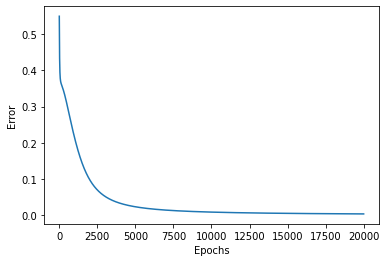

In [ ]:
print("After the completion of Training :\n")
z3=predict(X,w1,w2)
print("Y value predicted: ")
print(np.round(z3))
print("\n")
plt.plot(costs)
plt.ylabel('Error')
plt.xlabel('Epochs')
plt.show()

In [ ]:
X_test = np.array([[1,0,0.03],
 [1,0,0.99],
 [1,1,0 ],
 [1,1,0.2]])
y_test = np.array([[1.],
 [0.],
 [0.],
 [0.]])

test(X_test,y_test)

Test set is :
[[0.   0.03]
 [0.   0.99]
 [1.   0.  ]
 [1.   0.2 ]]

Predicted values for Test set are
[[0.]
 [0.]
 [0.]
 [0.]]

 And actual y values for test set are
[[1.]
 [0.]
 [0.]
 [0.]]
